# Lecture 23: Linear regression

This data-set of English Premier League (of soccer) players' information. We are interested in the relationship between height and weight. 

In [3]:
import numpy as np
import csv

with open('epl.csv', 'r') as f:
    reader = csv.reader(f)
    data_list = list(reader)
    
print(data_list[0])
print(data_list[1])
print(data_list[2])

['Team', 'Player', 'Number', 'Position', 'Age', 'Height', 'Weight']
['Arsenal', 'Aaron Ramsey', '16', 'M ', '24', '70', '168']
['Arsenal', 'Alex Oxlade-Chamberlain', '15', 'M ', '22', '71', '154']


In [4]:
# number of data points
N = len(data_list) - 1    # remove 1 because first line was just labels
N

526

In [5]:
heights = np.zeros(N)
weights = np.zeros(N)

for i in range(1,N+1):
    heights[i - 1] = data_list[i][5]   # height was at index 5
    weights[i - 1] = data_list[i][6]   # weight was at index 6

In [6]:
print(heights[:10])
print(weights[:10])

[ 70.  71.  67.  72.  72.  72.  70.  73.  70.  68.]
[ 168.  154.  154.  146.  161.  174.  163.  159.  163.  143.]


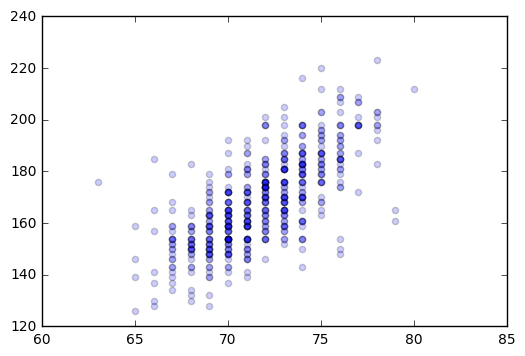

In [7]:
import matplotlib.pyplot as plt
plt.scatter(heights, weights, alpha=0.2)  # alpha makes the dots a little transparent
plt.show()

We would like to fit a line to this data. i.e.

**Question** Based on this information, what is the most likely linear relationship between the height and weight of a soccer player?

Since we are doing a linear model: if $x$ is height, then the weight $y$ should be 

$$ y = ax + b.$$

So we are looking for $a$ and $b$ that will fit the line as well as possible to the data. What does that mean though? It means that we want to minimize the error that our linear model $y = ax + b$ will have on predicting the weight from the height on our existing data. On a height-weight pair $(x_i, y_i)$ from our data-set, the model is guessing $y = ax_i + b$, and the actual answer is $y_i$. The total (squared) error is:

$$E(a,b) = \sum_{i=1}^{N} ((ax_i + b) - y_i)^2$$

where $\{(x_i, y_i)\}$ are our height-weight pairs. ("Why squared error and not sum of absolute values?" you might say, both are good options, there are good reasons to go for squared error as the first choice, long story but it has something to do with the Gaussian distribution being similar to $e^{x^2}$)).

We want to minimize this squared error function above. Our options:

* Solve $\nabla E(a,b) = 0$. The gradient will be zero at a local minimum.
* Use gradient descent.

### First method: 

Solving the gradient = 0. You write down the partial derivatives and solve the linear equations for $a$ and $b$. 

![Linear Regression by Hand](https://www.math.uci.edu/~isik/teaching/17W_MATH9/notes/regression_by_hand.jpg)

Let's code it up. 

In [8]:
X = heights
Y = weights
S1 = np.sum(X)
S2 = np.sum(X * X)  # sum of the squares
SM = np.sum(X * Y)   # sum of x_i * y_i
SY = np.sum(Y)
a = (1 / (N*S2 - S1*S1)) * (N * SM - S1 * SY)
b = (1 / (N*S2 - S1*S1)) * (- S1 * SM + S2 * SY)

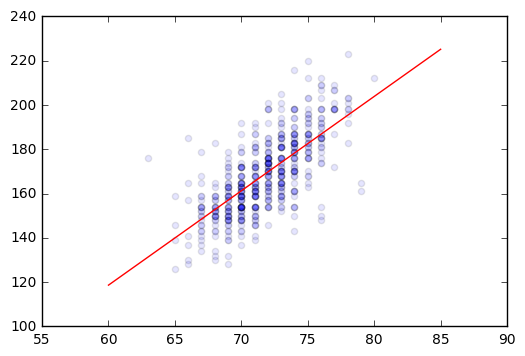

In [26]:
XX = np.linspace(60,85,200)
YY = a * XX + b
plt.scatter(heights, weights, alpha=0.1)
plt.plot(XX,YY,"r")
plt.show()

This is called a *closed-form solution* because we are getting straight to the answer. (no gradient descent or approximation)

There is a similar soution for when you are trying to learn a linear approximation from a data-set:

$$\{ (x^{(i)}_1,...,x^{(i)}_n,y^{(i)}) \}$$

where we would be trying to learn a function:

$$f(x_1,....,x_n)$$

(e.g. learning the weight from height and age)

It's called the **least squares** method. 

### First method using the built-in library:

No need to be a hero every time. We can use sklearn's `LinearRegression()` model.

You train the parameters by using the `fit` function and you use the function it learns using the `predict` function. 

/usr/local/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


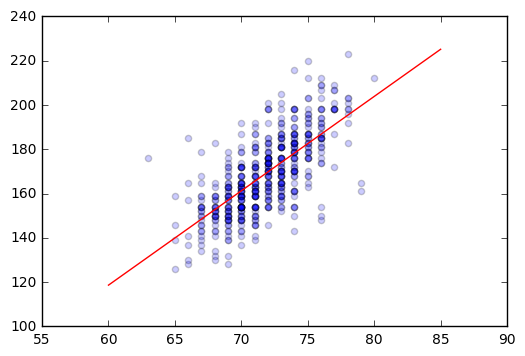

In [8]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(heights.reshape((N,1)), weights.reshape((N,1)))
XX = np.linspace(60,85,200).reshape((-1,1))
YY = regr.predict(XX)
plt.scatter(heights, weights, alpha=0.2)
plt.plot(XX,YY,"r")
plt.show()